In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report

# Load the data
data = pd.read_csv(' ')

# Select required parameters and target variable
X = data[['Gender', 'Subluxation_percent', 'Femoral_neck_angle', 'Lateral_center_edge_angle', 'extrusion_index']]
y = data['Cluster']

# Split the data into training and testing sets with a 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the SVM model
model = svm.SVC(probability=True)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Print the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Print the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Confusion Matrix:
 [[ 6 15]
 [ 0 52]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.29      0.44        21
           1       0.78      1.00      0.87        52

    accuracy                           0.79        73
   macro avg       0.89      0.64      0.66        73
weighted avg       0.84      0.79      0.75        73



In [3]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Calculate Accuracy, Recall and F1 Score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy, recall, f1

(0.7945205479452054, 1.0, 0.8739495798319328)

In [4]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')

# Misclassification Rate
misclassification_rate = 1 - accuracy
print(f'Misclassification Rate: {misclassification_rate:.2f}')





Accuracy: 0.79
Precision: 0.78
Recall: 1.00
F1 Score: 0.87
Misclassification Rate: 0.21


In [5]:
# Make new csv file contating ground truth and predicted cluster for visualiztion
# Make predictions on the training set and testing set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [6]:
# Add the predictions to the training and testing sets
X_train = X_train.copy()
X_test = X_test.copy()
X_train['Predicted_Cluster'] = y_train_pred
X_test['Predicted_Cluster'] = y_test_pred

In [7]:
# Create a new column to indicate whether each instance is in the training set or the testing set
X_train['Set'] = 'Train'
X_test['Set'] = 'Test'

In [8]:
# Merge the original data with the combined data
merged_data = pd.merge(data, pd.concat([X_train, X_test])[['Predicted_Cluster', 'Set']], left_index=True, right_index=True)


In [10]:
# Export the merged data to a CSV file
merged_data.to_csv('', index=False)


In [11]:
# Compute probabilities
y_test_prob = model.predict_proba(X_test.drop(columns=['Predicted_Cluster', 'Set']))

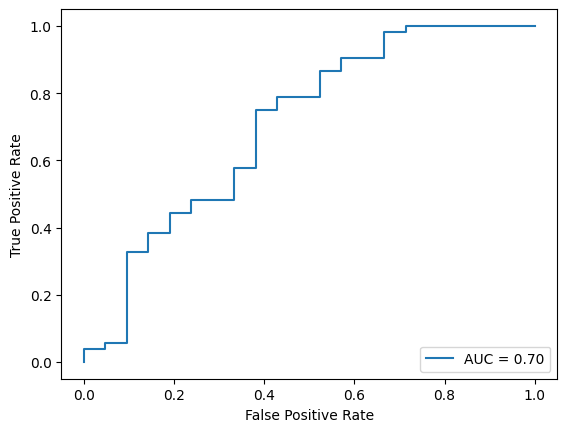

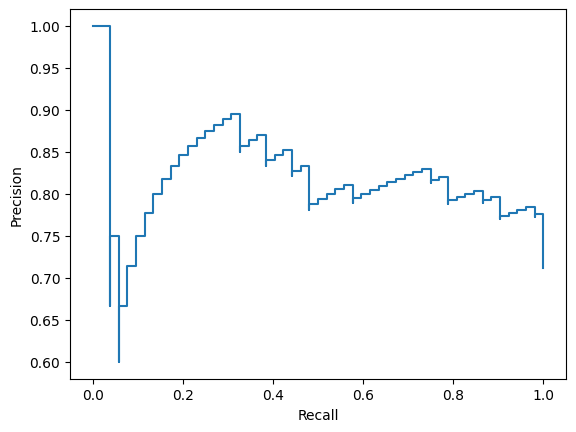

In [12]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt
# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_test_prob[:, 1])

# Plot ROC curve
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

# Plot Precision-Recall curve
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall).plot()

plt.show()

In [13]:
# Define new data
new_data = np.array([[1, 0.3, 135, 15, 0.4]])

# Predict the cluster for the new data
new_pred = model.predict(new_data)
print("\nNew Data Prediction:", new_pred)


New Data Prediction: [1]


C:\Users\36819\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [14]:
#Load external data
new_data = pd.read_csv('C:/Work/AI_Sports_Medicine/Hip/DDH/Cluster/External validation/External_validation_data_withgroundtruth_Cluster.csv')

In [15]:
#Select features used for prediction
new_X = new_data[['Gender', 'Subluxation_percent', 'Femoral_neck_angle', 'Lateral_center_edge_angle', 'extrusion_index']]

In [16]:
new_pred = model.predict(new_X)

In [17]:
# Add the prediction results to the DataFrame
new_data['Predicted_Cluster'] = new_pred

# Export the DataFrame to a new CSV file
new_data.to_csv('C:/Work/AI_Sports_Medicine/Hip/DDH/Cluster/Prediction_SVM_Xrayparameters/external_validation_predictions.csv', index=False)

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')

# Misclassification Rate
misclassification_rate = 1 - accuracy
print(f'Misclassification Rate: {misclassification_rate:.2f}')

Accuracy: 0.79
Precision: 0.78
Recall: 1.00
F1 Score: 0.87
Misclassification Rate: 0.21
